| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Analitika Media Sosial

### Fatimah Susilawati
### A12.2020.06432
### A12.6501

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

## outentifikasi dan hak akses

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("SbtGvRsiIy1nDmCPVKTgpWMtK", "RA5iiToE8iqHOkPwQLhS1FQsAGGIKtFKwA5YEYnC4oHuXSyUrO")
    auth.set_access_token("1576789174799446016-wD1KiB28mnVdYWaxquJNuvIdfB6JPT", "1Pu9xNobL0NMxiAjCWViJIHlEWrYQM2cD1aGu9urkwYGY")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username

username yang digunakan yakni @detikcom

In [4]:
tweets = extractor.user_timeline(screen_name="detikcom", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("100 tweet teratas:\n")
for tweet in tweets[:100]:
    print(tweet.text)
    print()

Tweets terambil: 200.

100 tweet teratas:

Tessa Mariska dikabarkan menggelar tumpengan usai Nikita Mirzani ditahan di Rutan Kelas IIB Serang. Lantas apa kata… https://t.co/yXZyanugfv

Seorang narapidana di Lembaga Pemasyarakatan Klas 2A Kediri tewas dikeroyok sesama napi. Polisi pun menetapkan 3 na… https://t.co/62ryXjJHkr

Satu set peta topografi Mars yang baru-baru ini dirilis memberikan bukti baru keberadaan samudra utara kuno di Plan… https://t.co/ApQX2y3mGO

Polisi menghentikan konser 'Berdendang Bergoyang' di Istora Senayan setelah puluhan orang pingsan. Hal ini terjadi… https://t.co/K0zqRK7OA4

Kenikmatan seseorang dalam bercinta sering dikonotasikan pada orgasme. Jika kesulitan mendapatkannya, cobalah cara-… https://t.co/PSHGePTNje

Seorang balita di Probolinggo meninggal usai diserang kawanan tawon di dekat rumahnya padahal ia tidak turut mengus… https://t.co/rUmeo9L74a

Sebanyak 88 PNS lingkup Pemkot Parepare diminta mengembalikan dana Bantuan Subsidi Upah (BSU). Berikut inf

## Masukkan ke dataframe pandas

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(100))

,Tweets
0,Tessa Mariska dikabarkan menggelar tumpengan u...
1,Seorang narapidana di Lembaga Pemasyarakatan K...
2,Satu set peta topografi Mars yang baru-baru in...
3,Polisi menghentikan konser 'Berdendang Bergoya...
4,Kenikmatan seseorang dalam bercinta sering dik...
...,...
95,Presiden AS Joe Biden menyampaikan dukacitanya...
96,#Foto Pesta Halloween di sebuah gang di Itaewo...
97,"""Begini saya bilang, di semua negara itu cacat..."
98,ICW berkomentar soal KPK yang mengkaji penggun...


In [6]:
dataset.to_csv('dataset_detikcom.csv')

## Menentukan Sentimen pada Tweet

In [7]:
#pip install textblob

In [8]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [9]:
auth = tweepy.OAuthHandler("SbtGvRsiIy1nDmCPVKTgpWMtK", "RA5iiToE8iqHOkPwQLhS1FQsAGGIKtFKwA5YEYnC4oHuXSyUrO")
auth.set_access_token("1576789174799446016-wD1KiB28mnVdYWaxquJNuvIdfB6JPT", "1Pu9xNobL0NMxiAjCWViJIHlEWrYQM2cD1aGu9urkwYGY")
api = tweepy.API(auth)

hasilsearch = api.search_tweets(q="detikcom",lang="id",count=100)

In [10]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["isi_tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

RT Orang kota juga tingkahnya lucu kalau ke desa naik kerbau tanam padi dan panjat pohon Rela2in bayar ratusan ribu per orang
'list' object has no attribute 'strip'
Emang lu kenal
'list' object has no attribute 'strip'
Ada nggak di Alqur an dan Hadist Jika ada knp harus tersinggung Seharusnya kita berbenah diri krn yg me
'list' object has no attribute 'strip'
Norak bgt sih
'list' object has no attribute 'strip'
RT Ga tau aja tingkah orang orang metropolitan yang mau bayar 300 ribu buat naik kebo dan nanam bibit padi dan bayar 250 r
'list' object has no attribute 'strip'
RT Warga Jakarta heboh saat melihat sawah dan pisang goreng di kopi klotok kaliurang Mereka menyebutnya healing
'list' object has no attribute 'strip'
RT Ga tau aja tingkah orang orang metropolitan yang mau bayar 300 ribu buat naik kebo dan nanam bibit padi dan bayar 250 r
'list' object has no attribute 'strip'
RT Ga tau aja tingkah orang orang metropolitan yang mau bayar 300 ribu buat naik kebo dan nanam bibit padi dan

'list' object has no attribute 'strip'
Masyaallah
'list' object has no attribute 'strip'
RT sementara di sini yg mestinya bertanggungjawab malah fun football para petinggi kita memang belum genap belajar adab
'list' object has no attribute 'strip'
Ini teh dia lagi bercanda dong sama buibu
'list' object has no attribute 'strip'
RT Saya akan ikut dlm barisan yg melawan kalau sampai event seperti HijrahFest amp HijabFest dilarang Jangan sampai pemerin
'list' object has no attribute 'strip'
RT Warga Jakarta heboh saat melihat sawah dan pisang goreng di kopi klotok kaliurang Mereka menyebutnya healing
'list' object has no attribute 'strip'
Keputusan yg tepat
'list' object has no attribute 'strip'
RT Ga tau aja tingkah orang orang metropolitan yang mau bayar 300 ribu buat naik kebo dan nanam bibit padi dan bayar 250 r
'list' object has no attribute 'strip'
Ga gitu konsepnya Bsu itu buat karyawan yang gajinya dibawah 3 5 JT Jadi sudah seharusnya
'list' object has no attribute 'strip'
RT Wahai

In [11]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0
1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0
2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0
3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0
4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
...,...,...,...,...
95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1
96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0
97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0
98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0


In [12]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Preprocessing Tahap 00
## Yang dipakai adalah Label Sentimen

In [13]:
df.head()

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0
1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0
2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0
3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0
4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0


## cek info

In [14]:
df.head(100)

,tanggal_tweet,pengguna,isi_tweet,sentimen
0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0
1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0
2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0
3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0
4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
...,...,...,...,...
95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1
96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0
97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0
98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tanggal_tweet  100 non-null    datetime64[ns, UTC]
 1   pengguna       100 non-null    object             
 2   isi_tweet      100 non-null    object             
 3   sentimen       100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 3.2+ KB


## Load Dataset

In [16]:
df = pd.read_csv('Dataset_Sentimen.csv')

df.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
5,5,2022-10-30 14:26:49+00:00,adore_bil,RT @heyylennon: Warga Jakarta heboh saat melih...,0
6,6,2022-10-30 14:26:48+00:00,andradhandra,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
7,7,2022-10-30 14:26:36+00:00,excelicio,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
8,8,2022-10-30 14:26:22+00:00,yugyeomoi,Hadeh Gusti https://t.co/hInQNvFfOB,0
9,9,2022-10-30 14:26:21+00:00,masedoo,"gua udah bilang, bisnis fnb disini kejem2 ke a...",0


In [17]:
df

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0
...,...,...,...,...,...
95,95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1
96,96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0
97,97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0
98,98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     100 non-null    int64 
 1   tanggal_tweet  100 non-null    object
 2   pengguna       100 non-null    object
 3   isi_tweet      100 non-null    object
 4   sentimen       100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [19]:
!pip install ekphrasis

In [20]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


C:\Users\ASUS\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\ASUS\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


In [21]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

In [22]:
import string

## Melakukan pembersihan dengan memanggil fungsi diatas

In [23]:
final_string = []
for text in df['isi_tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [24]:
df["step01"] = final_string

In [25]:
df

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...
...,...,...,...,...,...,...
95,95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1,rt user bayangin selama ini mereka bisa menikm...
96,96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0,user demi sdm glowing
97,97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...
98,98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0,rt user si fadli ketakutan di tempeleng mantu ...


#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [26]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(100)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...
...,...,...,...,...,...,...
95,95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1,rt user bayangin selama ini mereka bisa menikm...
96,96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0,user demi sdm glowing
97,97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...
98,98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0,rt user si fadli ketakutan di tempeleng mantu ...


## Hapus data kosong

In [27]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [28]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     0 non-null      int64 
 1   tanggal_tweet  0 non-null      object
 2   pengguna       0 non-null      object
 3   isi_tweet      0 non-null      object
 4   sentimen       0 non-null      int64 
 5   step01         0 non-null      object
dtypes: int64(2), object(4)
memory usage: 0.0+ bytes


In [29]:
df_hapus.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01


In [30]:
df_new = df[~df.isin(df_hapus)].dropna()

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     100 non-null    int64 
 1   tanggal_tweet  100 non-null    object
 2   pengguna       100 non-null    object
 3   isi_tweet      100 non-null    object
 4   sentimen       100 non-null    int64 
 5   step01         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [32]:
df_new

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...
...,...,...,...,...,...,...
95,95,2022-10-30 14:16:08+00:00,_Ryuuma,RT @Outstandjing: Bayangin selama ini mereka b...,-1,rt user bayangin selama ini mereka bisa menikm...
96,96,2022-10-30 14:16:04+00:00,codikaffffff,@detikcom Demi sdm glowing,0,user demi sdm glowing
97,97,2022-10-30 14:15:54+00:00,elisyazein,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...
98,98,2022-10-30 14:15:50+00:00,trinugroho162,RT @restyca_yah: 🤣🤣 Si fadli ketakutan di temp...,0,rt user si fadli ketakutan di tempeleng mantu ...


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [33]:
## Bisa menggunakan nltk 
import nltk
from nltk.tokenize import word_tokenize 

In [34]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [35]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [36]:
df_new.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"[rt, user, orang, kota, juga, tingkahnya, lucu..."
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"[user, user, user, emang, lu, kenal]"
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"[user, ada, nggak, di, alqur, an, dan, hadist,..."
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"[user, norak, bgt, sih]"
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang..."
5,5,2022-10-30 14:26:49+00:00,adore_bil,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...,"[rt, user, warga, jakarta, heboh, saat, meliha..."
6,6,2022-10-30 14:26:48+00:00,andradhandra,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang..."
7,7,2022-10-30 14:26:36+00:00,excelicio,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang..."
8,8,2022-10-30 14:26:22+00:00,yugyeomoi,Hadeh Gusti https://t.co/hInQNvFfOB,0,hadeh gusti cohinqnvffob,"[hadeh, gusti, cohinqnvffob]"
9,9,2022-10-30 14:26:21+00:00,masedoo,"gua udah bilang, bisnis fnb disini kejem2 ke a...",0,gua udah bilang bisnis fnb disini kejem2 ke an...,"[gua, udah, bilang, bisnis, fnb, disini, kejem..."


In [37]:
normalized_word = pd.read_csv('kamus_clean.csv', sep=",")

In [38]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [39]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [40]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [41]:
df_new["step02"] = final_string_tokens

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [42]:
df_new.head(10)

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"[rt, user, orang, kota, juga, tingkahnya, lucu...","[rt, user, orang, kota, juga, tingkahnya, lucu...",rt user orang kota juga tingkahnya lucu kalau ...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"[user, user, user, emang, lu, kenal]","[user, user, user, emang, lu, kenal]",user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"[user, ada, nggak, di, alqur, an, dan, hadist,...","[user, ada, nggak, di, alqur, an, dan, hadist,...",user ada nggak di alqur an dan hadist jika ada...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"[user, norak, bgt, sih]","[user, norak, bgt, sih]",user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang...","[rt, user, ga, tau, aja, tingkah, orang, orang...",rt user ga tau aja tingkah orang orang metropo...
5,5,2022-10-30 14:26:49+00:00,adore_bil,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...,"[rt, user, warga, jakarta, heboh, saat, meliha...","[rt, user, warga, jakarta, heboh, saat, meliha...",rt user warga jakarta heboh saat melihat sawah...
6,6,2022-10-30 14:26:48+00:00,andradhandra,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang...","[rt, user, ga, tau, aja, tingkah, orang, orang...",rt user ga tau aja tingkah orang orang metropo...
7,7,2022-10-30 14:26:36+00:00,excelicio,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang...","[rt, user, ga, tau, aja, tingkah, orang, orang...",rt user ga tau aja tingkah orang orang metropo...
8,8,2022-10-30 14:26:22+00:00,yugyeomoi,Hadeh Gusti https://t.co/hInQNvFfOB,0,hadeh gusti cohinqnvffob,"[hadeh, gusti, cohinqnvffob]","[hadeh, gusti, cohinqnvffob]",hadeh gusti cohinqnvffob
9,9,2022-10-30 14:26:21+00:00,masedoo,"gua udah bilang, bisnis fnb disini kejem2 ke a...",0,gua udah bilang bisnis fnb disini kejem2 ke an...,"[gua, udah, bilang, bisnis, fnb, disini, kejem...","[gua, udah, bilang, bisnis, fnb, disini, kejem...",gua udah bilang bisnis fnb disini kejem2 ke an...


## simpan file terlebih dahulu
gunakan fitur ini, kenapa? untuk mengecek apakah preprocessing kita sudah sesuai logika atau tidak
- Contoh : pastikan kata `beserta` tetap menjadi `beserta`, bukan `bese a`

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [43]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load dataset

In [44]:
import pandas as pd

In [45]:
dataset = pd.read_csv('clean_dataset_uts_part01.csv', sep=';')

In [46]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"['rt', 'user', 'orang', 'kota', 'juga', 'tingk...","['rt', 'user', 'orang', 'kota', 'juga', 'tingk...",rt user orang kota juga tingkahnya lucu kalau ...
1,1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"['user', 'user', 'user', 'emang', 'lu', 'kenal']","['user', 'user', 'user', 'emang', 'lu', 'kenal']",user user user emang lu kenal
2,2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"['user', 'ada', 'nggak', 'di', 'alqur', 'an', ...","['user', 'ada', 'nggak', 'di', 'alqur', 'an', ...",user ada nggak di alqur an dan hadist jika ada...
3,3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"['user', 'norak', 'bgt', 'sih']","['user', 'norak', 'bgt', 'sih']",user norak bgt sih
4,4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...","['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...",rt user ga tau aja tingkah orang orang metropo...


## Load sastrawi sebagai stemmer

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

##  stopwords

In [48]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
### Tuliskan perintahnya disini ???

stopwords_sastrawi = factory.create_stop_word_remover()

In [49]:
df_new['step02'] = df_new['step02'].apply(str)

In [50]:
df_new.head()

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"[rt, user, orang, kota, juga, tingkahnya, lucu...","[rt, user, orang, kota, juga, tingkahnya, lucu...",rt user orang kota juga tingkahnya lucu kalau ...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"[user, user, user, emang, lu, kenal]","[user, user, user, emang, lu, kenal]",user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"[user, ada, nggak, di, alqur, an, dan, hadist,...","[user, ada, nggak, di, alqur, an, dan, hadist,...",user ada nggak di alqur an dan hadist jika ada...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"[user, norak, bgt, sih]","[user, norak, bgt, sih]",user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang...","[rt, user, ga, tau, aja, tingkah, orang, orang...",rt user ga tau aja tingkah orang orang metropo...


In [51]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [52]:
df_new.loc[:, ('ProcessedText')] = final_string

In [53]:
df_new.head()

,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"[rt, user, orang, kota, juga, tingkahnya, lucu...","[rt, user, orang, kota, juga, tingkahnya, lucu...",rt user orang kota juga tingkahnya lucu kalau ...,rt user orang kota tingkah lucu kalau desa nai...
1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"[user, user, user, emang, lu, kenal]","[user, user, user, emang, lu, kenal]",user user user emang lu kenal,user user user emang lu kenal
2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"[user, ada, nggak, di, alqur, an, dan, hadist,...","[user, ada, nggak, di, alqur, an, dan, hadist,...",user ada nggak di alqur an dan hadist jika ada...,user nggak alqur an hadist ada knp singgung ki...
3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"[user, norak, bgt, sih]","[user, norak, bgt, sih]",user norak bgt sih,user norak bgt sih
4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"[rt, user, ga, tau, aja, tingkah, orang, orang...","[rt, user, ga, tau, aja, tingkah, orang, orang...",rt user ga tau aja tingkah orang orang metropo...,rt user ga tau aja tingkah orang orang metropo...


## simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [54]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

### load dataset

In [55]:
import pandas as pd
import numpy as np

In [56]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [57]:
dataset.shape

(100, 11)

In [58]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,tanggal_tweet,pengguna,isi_tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,0,0,2022-10-30 14:27:03+00:00,sayahanyazakie,RT @maman1965: Orang kota juga tingkahnya lucu...,0,rt user orang kota juga tingkahnya lucu kalau ...,"['rt', 'user', 'orang', 'kota', 'juga', 'tingk...","['rt', 'user', 'orang', 'kota', 'juga', 'tingk...",rt user orang kota juga tingkahnya lucu kalau ...,rt user orang kota tingkah lucu kalau desa nai...
1,1,1,2022-10-30 14:27:02+00:00,Shopeeracunku1,@Omnoto2 @ZoelHelmiLubis1 @detikcom Emang lu k...,0,user user user emang lu kenal,"['user', 'user', 'user', 'emang', 'lu', 'kenal']","['user', 'user', 'user', 'emang', 'lu', 'kenal']",user user user emang lu kenal,user user user emang lu kenal
2,2,2,2022-10-30 14:26:57+00:00,Irwan7189185522,@detikcom Ada nggak di Alqur'an dan Hadist?.Ji...,0,user ada nggak di alqur an dan hadist jika ada...,"['user', 'ada', 'nggak', 'di', 'alqur', 'an', ...","['user', 'ada', 'nggak', 'di', 'alqur', 'an', ...",user ada nggak di alqur an dan hadist jika ada...,user nggak alqur an hadist ada knp singgung ki...
3,3,3,2022-10-30 14:26:53+00:00,maudhyputri,@detikcom Norak bgt sih,0,user norak bgt sih,"['user', 'norak', 'bgt', 'sih']","['user', 'norak', 'bgt', 'sih']",user norak bgt sih,user norak bgt sih
4,4,4,2022-10-30 14:26:50+00:00,sonofmomyndady,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...","['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...",rt user ga tau aja tingkah orang orang metropo...,rt user ga tau aja tingkah orang orang metropo...
5,5,5,2022-10-30 14:26:49+00:00,adore_bil,RT @heyylennon: Warga Jakarta heboh saat melih...,0,rt user warga jakarta heboh saat melihat sawah...,"['rt', 'user', 'warga', 'jakarta', 'heboh', 's...","['rt', 'user', 'warga', 'jakarta', 'heboh', 's...",rt user warga jakarta heboh saat melihat sawah...,rt user warga jakarta heboh lihat sawah pisang...
6,6,6,2022-10-30 14:26:48+00:00,andradhandra,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...","['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...",rt user ga tau aja tingkah orang orang metropo...,rt user ga tau aja tingkah orang orang metropo...
7,7,7,2022-10-30 14:26:36+00:00,excelicio,RT @AgusMagelangan: Ga tau aja tingkah orang-o...,0,rt user ga tau aja tingkah orang orang metropo...,"['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...","['rt', 'user', 'ga', 'tau', 'aja', 'tingkah', ...",rt user ga tau aja tingkah orang orang metropo...,rt user ga tau aja tingkah orang orang metropo...
8,8,8,2022-10-30 14:26:22+00:00,yugyeomoi,Hadeh Gusti https://t.co/hInQNvFfOB,0,hadeh gusti cohinqnvffob,"['hadeh', 'gusti', 'cohinqnvffob']","['hadeh', 'gusti', 'cohinqnvffob']",hadeh gusti cohinqnvffob,hadeh gusti cohinqnvffob
9,9,9,2022-10-30 14:26:21+00:00,masedoo,"gua udah bilang, bisnis fnb disini kejem2 ke a...",0,gua udah bilang bisnis fnb disini kejem2 ke an...,"['gua', 'udah', 'bilang', 'bisnis', 'fnb', 'di...","['gua', 'udah', 'bilang', 'bisnis', 'fnb', 'di...",gua udah bilang bisnis fnb disini kejem2 ke an...,gua udah bilang bisnis fnb sini kejem2 anak bu...


In [59]:
dataset_feature = df_new['ProcessedText'].astype(str)

In [60]:
dataset_label = df_new['sentimen']

In [61]:
dataset_feature

0     rt user orang kota tingkah lucu kalau desa nai...
1                         user user user emang lu kenal
2     user nggak alqur an hadist ada knp singgung ki...
3                                    user norak bgt sih
4     rt user ga tau aja tingkah orang orang metropo...
                            ...                        
95    rt user bayangin lama mereka nikmat weekend ke...
96                                     user sdm glowing
97    rt user warga jakarta heboh lihat sawah pisang...
98    rt user si fadli takut tempeleng mantu si luhu...
99    user jangan ulang tonton lebih kajadian belaka...
Name: ProcessedText, Length: 100, dtype: object

In [62]:
dataset_label

0     0
1     0
2     0
3     0
4     0
     ..
95   -1
96    0
97    0
98    0
99    0
Name: sentimen, Length: 100, dtype: int64

### Cek Distribusi Data

In [63]:
dataset_label.value_counts()

 0    93
 1     5
-1     2
Name: sentimen, dtype: int64

In [64]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 0    93.0%
 1     5.0%
-1     2.0%
Name: sentimen, dtype: object

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
sources = []
for source in dataset['sentimen']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* 0
* 1
* -1


<Figure size 864x576 with 0 Axes>

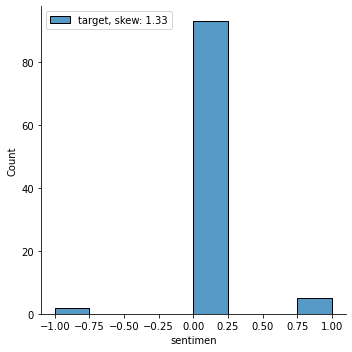

In [176]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

**dapat kita lihat pada proses distribusi data pada dataset(narasi) yang saya gunakan, menghasilkan 93% untuk parameter 0 (netral), untuk 5% untuk parameter 1 (positif), sedangkan 2% untuk parameter -1 (negatif)**

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Sentimen

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
vectorizer = TfidfVectorizer()

In [145]:
X = vectorizer.fit_transform(dataset_feature)

In [146]:
print(X.shape)

(100, 514)


In [147]:
features = vectorizer.get_feature_names_out()
features

array(['aamiin', 'abai', 'acara', 'ada', 'adab', 'aja', 'ajak', 'ajar',
       'akal', 'akan', 'aktor2x', 'alami', 'alas', 'allah', 'alokasi',
       'alqur', 'amal', 'an', 'anak', 'anggar', 'apa', 'apalgi', 'ar',
       'area', 'astaghfiruallah', 'atas', 'baca', 'bagai', 'bagus',
       'bakal', 'balita', 'bandung', 'bang', 'bansos', 'bantu', 'banyak',
       'baris', 'baru', 'bawah', 'bayangin', 'bayar', 'bbm', 'beban',
       'beberapa', 'beda', 'belah', 'belakang', 'beli', 'benah',
       'beneran', 'ber', 'beri', 'berita', 'bertanggungjawab', 'bgt',
       'biar', 'bibit', 'bikin', 'bilang', 'bina', 'binatang', 'bingung',
       'bisnis', 'bliss', 'bpjs', 'bro', 'bsu', 'buah', 'buat', 'buibu',
       'bukan', 'bukti', 'bulan', 'butuh', 'bwi', 'bws', 'calon2',
       'canda', 'cara', 'cari', 'cekam', 'china', 'cinta', 'cm', 'cma',
       'co2uysd6u0kq', 'co62ryxjjhkr', 'coakbvpivksv', 'coapqx2y3mgo',
       'coax7f3qwja3', 'coba', 'cobja2ffmdna', 'coc8bygcqpxg',
       'cocwjnn3bwi

In [148]:
idfValues = vectorizer.idf_

In [149]:
d = dict(zip(features, 9 - idfValues))

In [150]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [151]:
for i in range(200):
    print(sortedDict[i])

('user', 7.8392267794122485)
('rt', 7.296902488586887)
('orang', 6.5629333135066865)
('ga', 6.429401920882164)
('number', 6.429401920882164)
('lihat', 6.380611756712732)
('warga', 6.380611756712732)
('goreng', 6.3293184623251815)
('bayar', 6.275251241054905)
('healing', 6.275251241054905)
('heboh', 6.275251241054905)
('jakarta', 6.275251241054905)
('kaliurang', 6.275251241054905)
('klotok', 6.275251241054905)
('kopi', 6.275251241054905)
('naik', 6.275251241054905)
('padi', 6.275251241054905)
('pisang', 6.275251241054905)
('ribu', 6.275251241054905)
('sawah', 6.275251241054905)
('sebut', 6.275251241054905)
('tingkah', 6.275251241054905)
('buat', 6.2180928272149565)
('tau', 6.2180928272149565)
('aja', 6.157468205398522)
('mau', 6.157468205398522)
('bibit', 6.092929684260951)
('kebo', 6.092929684260951)
('metropolitan', 6.092929684260951)
('nanam', 6.092929684260951)
('yg', 6.092929684260951)
('sini', 5.4643210248385765)
('ajar', 5.330789632214054)
('malah', 5.330789632214054)
('memang', 

In [152]:
positive_low_reviews = dataset[(dataset["sentimen"] == 1)]
negative_low_reviews = dataset[(dataset["sentimen"] == -1)]
neutral_reviews = dataset[(dataset["sentimen"] == 0)]
positive_high_reviews = dataset[(dataset["sentimen"] == 2)]
negative_high_reviews = dataset[(dataset["sentimen"] == -2)]

In [153]:
#!pip install wordcloud

In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [155]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

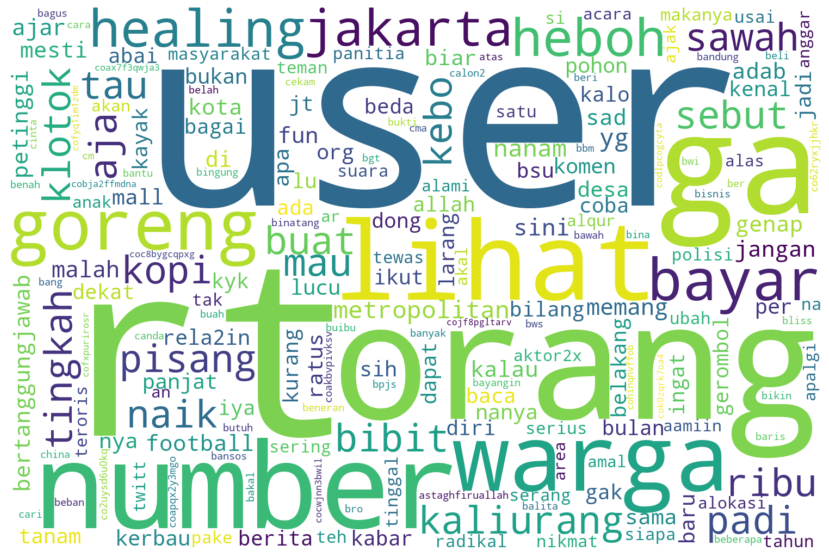

In [156]:
PlotWordCloud(d)

## Cek sentimen untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [157]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [158]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [159]:
Data_TFIDF.shape

(100, 1162)

## Training dan Testing dibagi menjadi 70 - 30
dengan 70 untuk data training dan 30 untuk data testing

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [161]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [162]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [163]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [164]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [165]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [166]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

### nilai accuracy Training set dan Test set

In [167]:
## Berapa nilai Accuracy Training set dan Test Set 
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.9666666666666667


### nilai Recall Training set dan Test set 

In [168]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.9666666666666667


### nilai Precision Training set dan Test set

In [169]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.9345238095238095


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


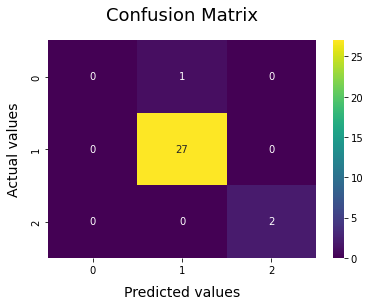

In [170]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [171]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [172]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.966667


In [173]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [174]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.966667,0.966667,0.934524


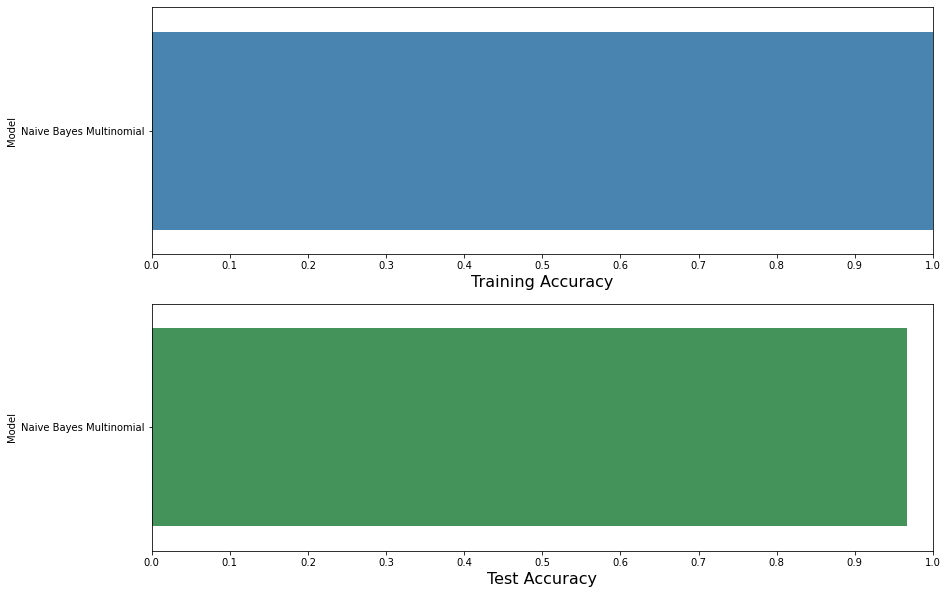

In [175]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan:

dari hasil pengujian setelah melakukan proses stemming dan stopworld dapat kita lihat bahwa nilai training dan testing memiliki niai akurasi yang tinggi dimana untuk training memiliki nilai akurasi sebanyak 1,0 sedangkan testing memiliki akurasi 0,97